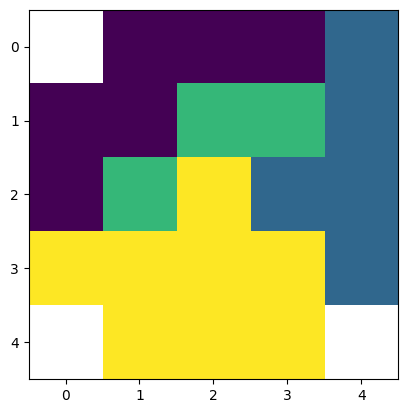

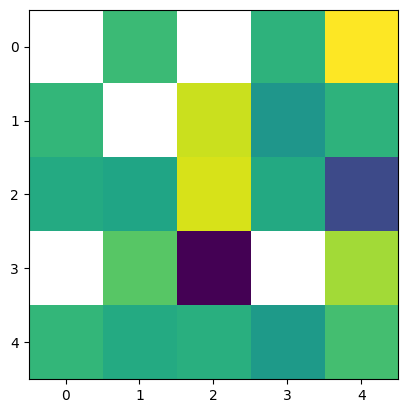

In [33]:
import numpy as np
import matplotlib.pyplot as plt


atlas = np.array([[np.nan, 1, 1, 1, 2],
                  [1, 1, 3, 3, 2],
                  [1, 3, 4, 2, 2],
                  [4, 4, 4, 4, 2],
                  [np.nan, 4, 4, 4, np.nan]])

plt.imshow(atlas)
plt.show()

data = np.array([[np.nan, 1.1, np.nan, 0.91, 2.7],
                  [1, np.nan, 2.3, 0.3, 0.92],
                  [0.75, 0.63, 2.4, 0.72, -1.2],
                  [np.nan, 1.4, -2.34, np.nan, 2],
                  [1, 0.74, 0.84, 0.4, 1.2]])

plt.imshow(data)
plt.show()

In [37]:
def register_frame(data, atlas):
    """
    Takes a frame of data and averages every (non-nan) point that belong to the same region, 
    according to the provided atlas. Returns a one dimensional array per frame."""

    flattened_atlas = atlas.flatten()[~np.isnan(atlas.flatten())]
    regions = set(flattened_atlas)
    print(regions)

    registered_data = np.zeros(len(regions)) # As many data points as there are regions in the atlas
    print(registered_data.shape)

    for i, region_label in enumerate(regions): # For each region index

        region_label = int(region_label)
        
        print(f"For region {region_label}: Indices {atlas == region_label}")
        print(f"items {data[atlas == region_label]}")

        registered_data[i] = np.nanmean(data[atlas == region_label])

        print(f"final value {registered_data[i]}")

    return registered_data

def register_data(data, atlas):
    """
    Takes an array of 3D data and averages every (non-nan) point that belong to the same region, 
    according to the provided atlas. Returns a one dimensional array per frame (dim 0 = time, dim 1 = regions)."""

    flattened_atlas = atlas.flatten()[~np.isnan(atlas.flatten())]
    regions = set(flattened_atlas)

    registered_data = np.zeros((data.shape[0], 1, len(regions))) # As many data points as there are regions in the atlas

    for t in range(data.shape[0]): # For each time step

        data_frame = data[t,:,:]

        for i, region_label in enumerate(regions): # For each region index
    
            region_label = int(region_label)
            registered_data[t, 0, i] = np.nanmean(data_frame[atlas == region_label])

    return registered_data

data = np.array([[[np.nan, 1.1, np.nan, 0.91, 2.7],
                [1, np.nan, 2.3, 0.3, 0.92],
                [0.75, 0.63, 2.4, 0.72, -1.2],
                [np.nan, 1.4, -2.34, np.nan, 2],
                [1, 0.74, 0.84, 0.4, 1.2]],
                [[np.nan, 1.2, np.nan, 0.91, 2.7],
                [2, np.nan, 2.3, 0.3, 0.92],
                [0.75, 0.63, 2.4, 0.72, 1.2],
                [np.nan, np.nan, -2.34, np.nan, 2],
                [1, 0.74, 0.84, 0.4, 1.99]]])


print(register_data(data, atlas))

print(register_data(data, atlas).shape)

[[[0.94       1.028      1.07666667 0.57333333]]

 [[1.215      1.508      1.07666667 0.408     ]]]
(2, 1, 4)


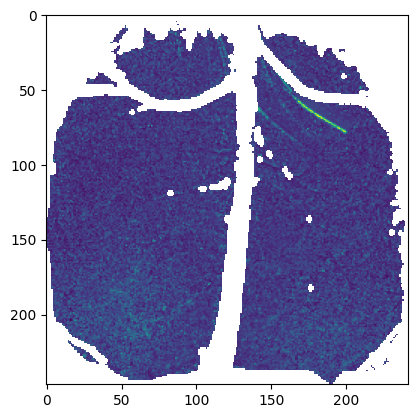

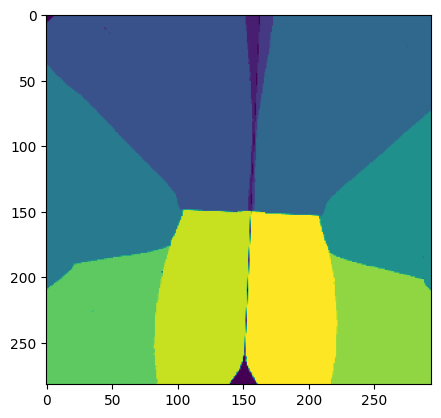

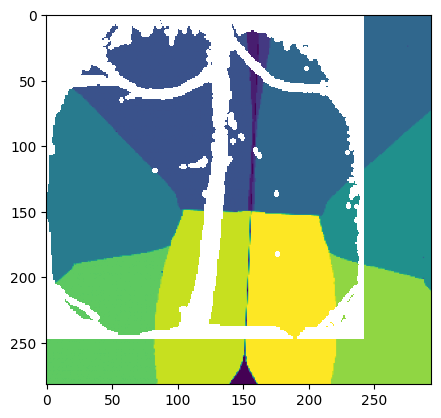

In [31]:
from toolbox_jocha.hdf5 import get_data_from_dataset
import tifffile

def read_data(filename):
    """Read data in tiff or npy files"""

    if filename[-4:] == ".tif":
        return tifffile.imread(filename)
    elif filename[-4:] == ".npy":
        return np.load(filename)
    raise ValueError("Could not recognize file extension.")

filepath = f"D:/mouse_data/new_data/M308-14/formatted/M308-14_v1.h5"
atlas = read_data(f"D:/mouse_data/new_data/M308-14/atlas.npy")
atlas = atlas[::2,::2]

data, _ = get_data_from_dataset(filepath, "data/3d/GCaMP")

plt.imshow(data[0,:,:])
plt.show()

plt.imshow(atlas)
plt.show()

nan_mask = np.where(np.isnan(data[0]))
atlas = np.asarray(atlas, np.float64)
atlas[nan_mask] = np.nan

plt.imshow(atlas)
plt.show()


In [32]:
data_path = "data/3d/GCaMP"

registered_data_path = "registration/" + data_path.split('/', 1)[1]

print(registered_data_path)

registration/3d/GCaMP


In [38]:
regions_labels = [["1", "region1"], ["2", "region2"], ["3", "region3"]]

print(dict(regions_labels))

{'1': 'region1', '2': 'region2', '3': 'region3'}
